<a href="https://colab.research.google.com/github/Harryjha/deeplearning-proj/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to neural network classification with Tensorflow

In this we gona learn classification prroblem in neural network
A classification is where you try to classify something as one thing or another
A few types of classification problem
* binary
* Multiclass
* Multilable


### Creating data to view and fit


In [ ]:
import tensorflow as tf
tf.__version__
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-07-04 09:46:48.443678


In [ ]:
from sklearn.datasets import make_circles

#Makes 1000 example
n_sample = 1000

#create circle
X, Y = make_circles(n_sample,
                    noise=0.03,
                    random_state=42)

In [ ]:
#check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check our lables
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1" :X[:,1],"label":Y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

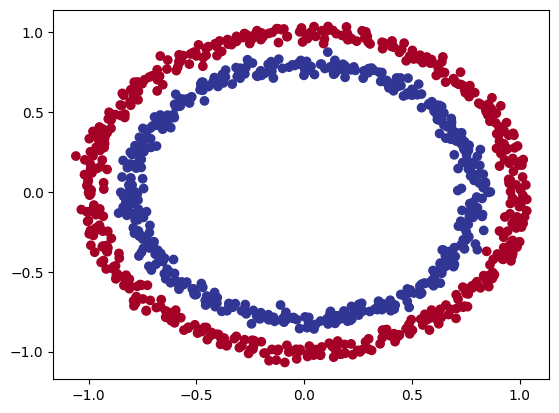

In [ ]:
# Visualize with the plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=Y,cmap=plt.cm.RdYlBu);


In [ ]:
X.shape,Y.shape

((1000, 2), (1000,))

In [ ]:
#How many sample we are workin with
len(X),len(Y)

(1000, 1000)

In [ ]:
X[0],Y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modeling
1. crete or import the model
2. compile the model
3. Fit the model
4. evalute the model
5. tweak
6. evaluate  


In [ ]:
from keras.engine.training import optimizer
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
   # tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
#2. compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
#3. fit the model
model_1.fit(X, Y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.8867 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3247 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.1356 - accuracy: 0.5240
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.7684 - accuracy: 0.5740
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.9738 - accuracy: 0.5520


In [ ]:
model_1.fit(X, Y, epochs=200, verbose=0)
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

since we are workin binary classification problem and our model is getting around ~50% accuracy .... it's performoing as if
its gussing

In [ ]:
#adding a extra layer
tf.random.set_seed(42)

#1. create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy
                ,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. Fit the model
model_2.fit(X,Y, epochs=100, verbose=0)

In [ ]:
model_1.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving the model
1. Create a model
2. Compile a model
3. Fitting a model


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#3. fit the model
model_3.fit(X,Y, epochs=100 , verbose=0)

In [ ]:
# Evaluate the model
model_3.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5120


[0.6971665620803833, 0.5120000243186951]

### To vizualize our model predition


In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


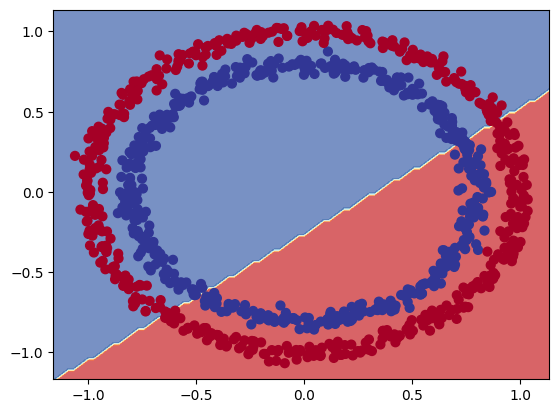

In [ ]:
plot_decision_boundary(model_3, X, Y)

In [ ]:
#lets see if our model can be used for a regration problem
#tf.random.set_seed(42)

#. create some regration data
#X_regression = tf.range(0, 1000, 5)
#Y_regression = tf.range(100, 1100, 5) # Y = X + 100

# split our regration data
#X_reg_train = X_regression[:150]
#X_reg_test  = X_regression[150:]
#Y_reg_train = Y_regression[:150]
#Y_reg_test  = Y_regression[150:]
# Fit our model for regration model
#model_3.fit(X_reg_train, Y_reg_train, epochs=100)

In [ ]:
# Setup the random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
#model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            #Y_reg_train,
             #epochs=100)

In [ ]:
# Make pridiction with our training data
#Y_reg_preds = model_3.predict(X_reg_test)

#plot the model pridiction againsst our regration data
#plt.figure(figsize=(10, 7))
#plt.scatter(X_reg_train, Y_reg_train, c="b", label="Training data")
#plt.scatter(X_reg_test, Y_reg_test, c="g", label="Test data")
#plt.scatter(X_reg_test, Y_reg_preds, c="r", label="Prediction")
#plt.legend();

### The missing piece: Non-linearity

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. fit the model
history = model_4.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.8964 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8710 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8266 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8153 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7974 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7560 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6915 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6829 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6721 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6576 - accuracy: 0.4810
Epoch 11/

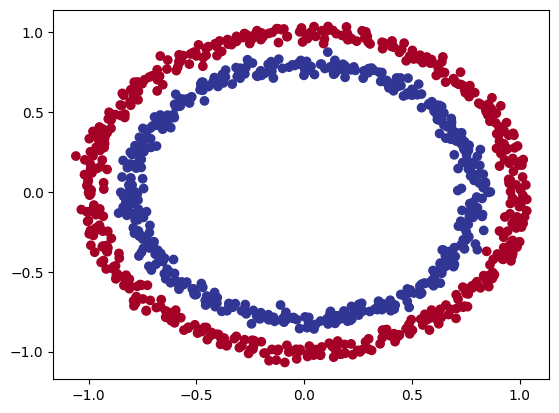

In [ ]:
# check out our data
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


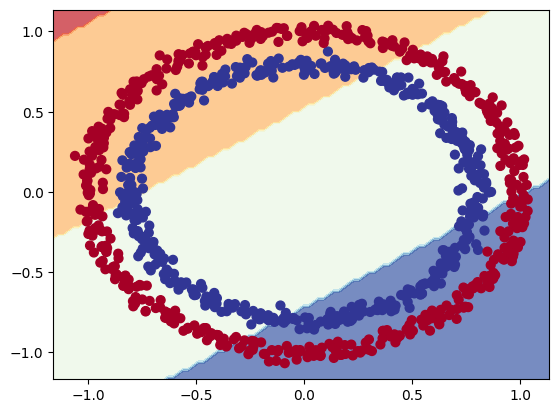

In [ ]:
# check trhe desion boundry
plot_decision_boundary(model_4,X,Y)


lets try our first neural network  with non-linear

In [ ]:
#set randoim seed
tf.random.set_seed(42)

#create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= tf.keras.activations.relu)
    #tf.keras.layers.Dense(1)
])
#compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
#fit the model
history=model_5.fit(X,Y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.9301 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8105 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6347 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5895 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5858 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5739 - accuracy: 0.4680
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5710 - accuracy: 0.4670
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5338 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5168 - accuracy: 0.4690
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5116 - accuracy: 0.4710
Epoch 11/

In [ ]:
# Time to replicate the multilayer neural network from tensorflow playground

# set the random seed
tf.random.set_seed(42)
# 1. create the model
model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2.compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history=model_6.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.4821 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7994 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0045 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0117 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8739 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8195 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7825 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7570 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7389 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.4920
Epoch 11/

In [ ]:
model_6.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.7030


[0.6410534381866455, 0.703000009059906]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


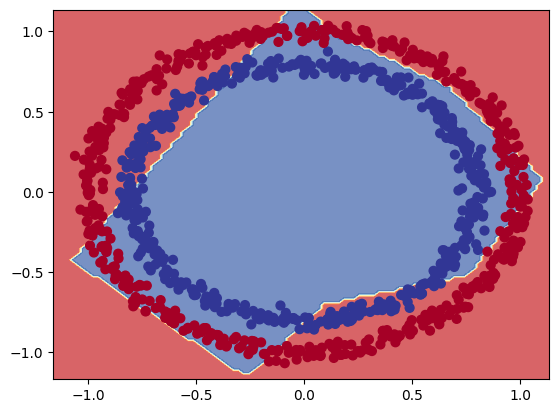

In [ ]:
plot_decision_boundary(model_6, X, Y)

In [ ]:
# set the random seed
tf.random.set_seed(42)
# 1. create the model
model_7= tf.keras.Sequential([
     tf.keras.layers.Dense(10, activation="relu"), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(1, activation="relu"), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation="sigmoid") # ouput layer, sigmoid activation
])
# 2.compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. Fit the model
history=model_7.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5080
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5080
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5160
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5140
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5260
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5370
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5330
Epoch 11/

In [ ]:
model_7.evaluate(X, Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.9990


[0.25250279903411865, 0.9990000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


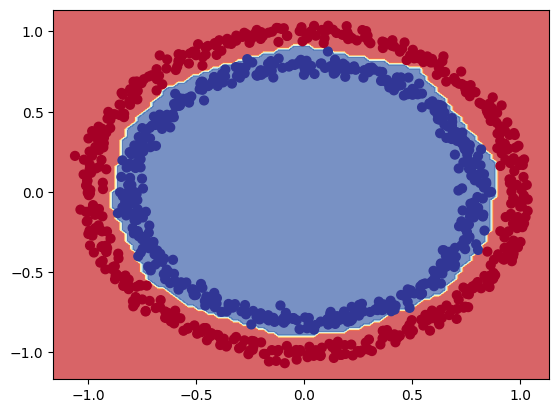

In [ ]:
plot_decision_boundary(model_7, X, Y)

In [ ]:
#create a toy a tensor(similar to the data we pass into our models)
A= tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

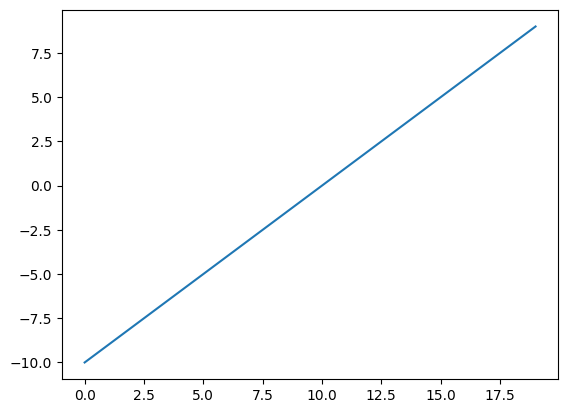

In [ ]:
plt.plot(A);

In [ ]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

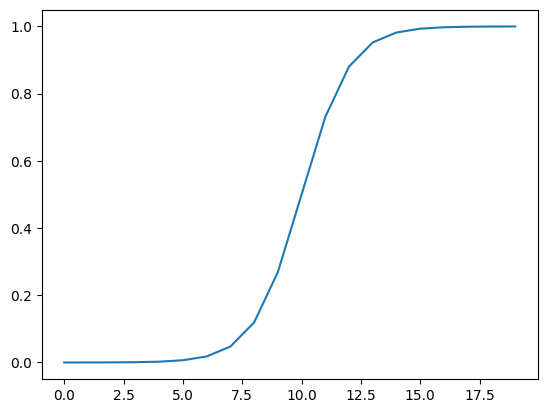

In [ ]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [ ]:
#lets recreate the relu function
def relu(x):
  return tf.maximum(0, x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

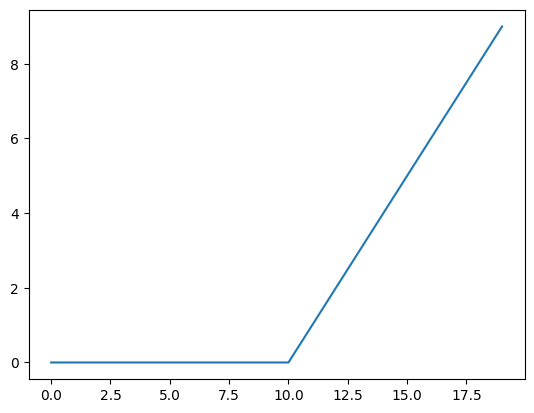

In [ ]:
plt.plot(relu(A));

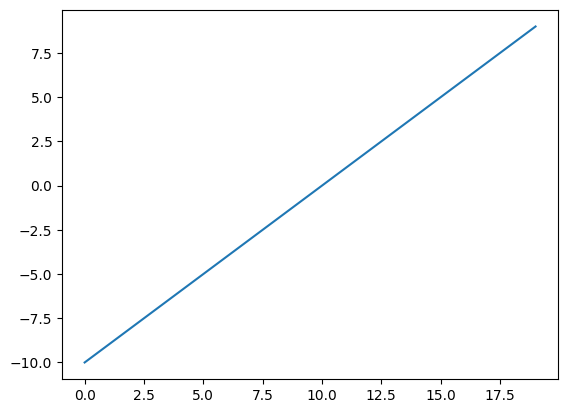

In [ ]:
#lets try linear activation function
plt.plot(tf.keras.activations.linear(A));

###Evaluating and improving our classification model
If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
#check how many example we have
len(X)

1000

In [ ]:
#split into train and test set s
X_train, Y_train = X[:800], Y[:800]
X_test , Y_test = X[800:] , Y[800:]
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#lest create a model a fit the training data and evaluating on the testing data

tf.random.set_seed(42)

# 1. create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#copile the model
model_8.compile(#loss="binary_crossentropy",
                loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
#fit the model
history= model_8.fit(X_train, Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5063
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.4900
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5038
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5175
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5400
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5300
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5763
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6438
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7525
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6575
Epoch 11/25
25/25 [

In [ ]:
#Evaluate the model
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 1.0000


[0.23487979173660278, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


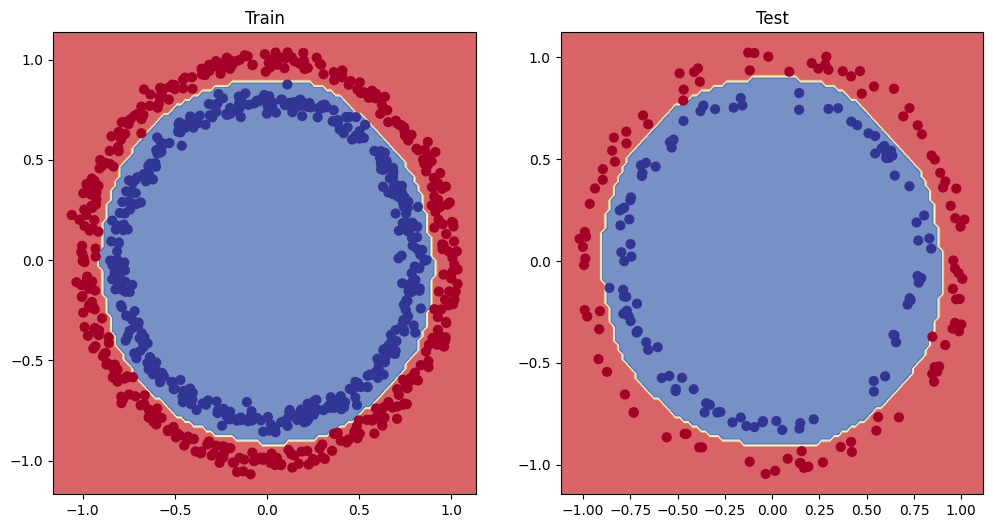

In [ ]:
#plot the desion boundry
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=Y_test)

plt.show()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693257,0.50625
1,0.688418,0.49000
2,0.685425,0.50375
3,0.681871,0.51750
4,0.678196,0.54000
5,0.672885,0.53000
6,0.665203,0.57625
7,0.659509,0.64375
8,0.650356,0.75250
9,0.639720,0.65750


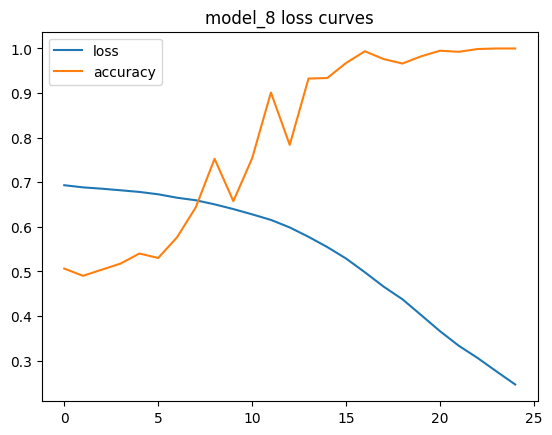

In [ ]:
#plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves");

**Note** for many problem, the loss function is going down means the model is improving (the pridiction is making are grtting closer)

### Finding the best learning rate
to find the ideal learning rate
1. A learning rate callback - you think callback as an extra pices of
2. Another model(We could use the same one as above, but we`re pracricing )
3. A modified loss cureves plot

In [ ]:
#set random seed
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# ompile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
#Create a learing rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model
history = model_9.fit(X_train,
                      Y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7022 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.4900 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7002 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

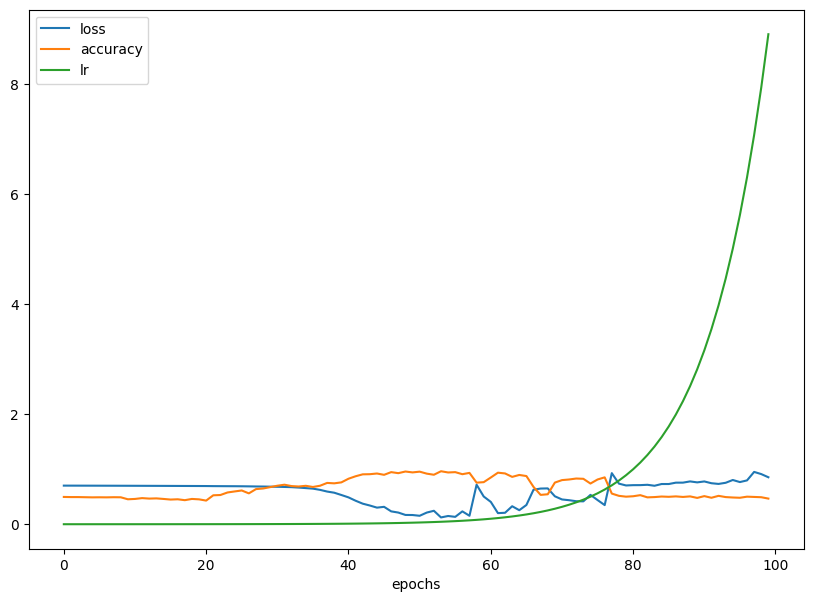

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learing rate vs loss')

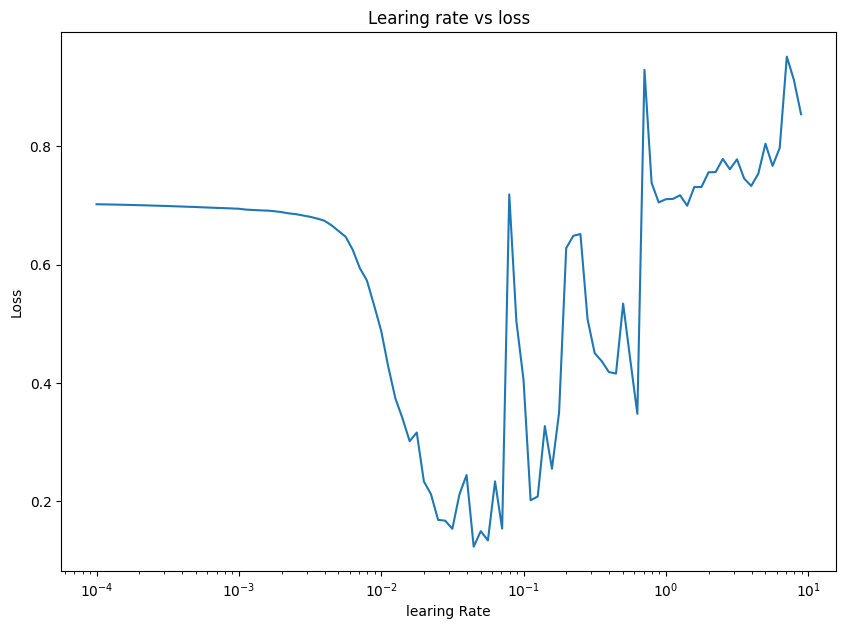

In [ ]:
#plot the learing rate vs loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learing Rate")
plt.ylabel("Loss")
plt.title("Learing rate vs loss")


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, Y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6909 - accuracy: 0.4963
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5263
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5200
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5450
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5813
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.5638
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.6500
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6875
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.7912
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6121 - accuracy: 0.7663
Epoch 11/20
25/25 [

In [ ]:
#Evaluate the modle_10
model_10.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.9950


[0.29675665497779846, 0.9950000047683716]

In [ ]:
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2349 - accuracy: 1.0000


[0.23487979173660278, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


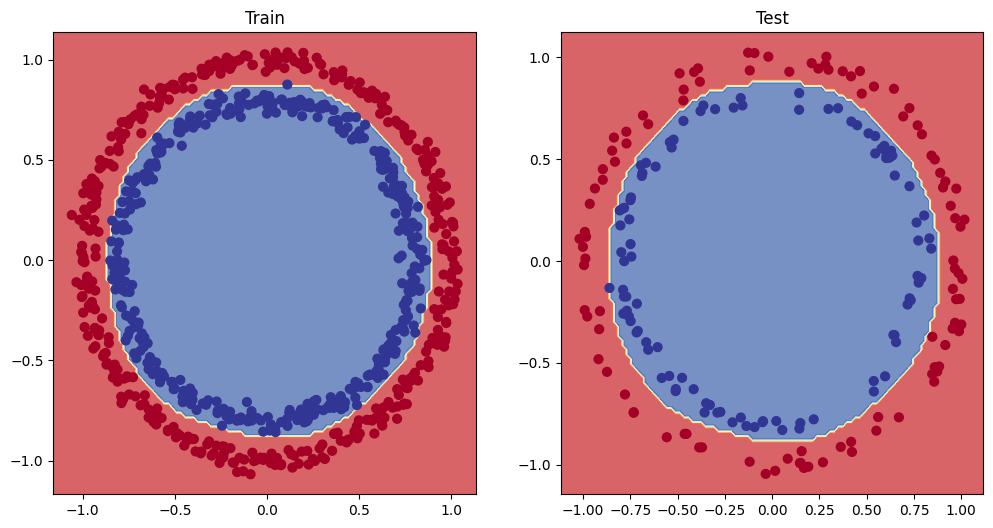

In [ ]:
#plot the desicion boundry
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=Y_train)
plt.subplot(1, 2 , 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y =Y_test)
plt.show();

###More classification evaluation methods
Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.
1. Accuracy
2. Precision
3. Recall
4. F1-score
5. Confusion metrix

Metric name/Evaluation method	Defintion	Code
Accuracy	Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct.	sklearn.metrics.accuracy_score() or tf.keras.metrics.Accuracy()
Precision	Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0).	sklearn.metrics.precision_score() or tf.keras.metrics.Precision()
Recall	Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives.	sklearn.metrics.recall_score() or tf.keras.metrics.Recall()
F1-score	Combines precision and recall into one metric. 1 is best, 0 is worst.	sklearn.metrics.f1_score()
Confusion matrix	Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).	Custom function or sklearn.metrics.plot_confusion_matrix()
Classification report	Collection of some of the main classification metrics such as precision, recall and f1-score.


In [ ]:
# Check the accuracy of the model
loss, accuracy= model_10.evaluate(X_test, Y_test)
print(f"model loss on test set: {loss}")
print(f"model accuracy onn the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.9950
model loss on test set: 0.29675665497779846
model accuracy onn the test set:99.50%


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(Y_test, y_preds)


7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_preds[:10]

array([[0.7053342 ],
       [0.8172949 ],
       [0.7198896 ],
       [0.7591616 ],
       [0.31123677],
       [0.17241172],
       [0.6434034 ],
       [0.19690983],
       [0.7437695 ],
       [0.22478013]], dtype=float32)

In [ ]:
# Convert the prediction probability to binsry format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
#lets create a confusion matrix
confusion_matrix(Y_test, tf.round(y_preds))

array([[101,   0],
       [  1,  98]])

How about we prettify our conffusion. matrix?


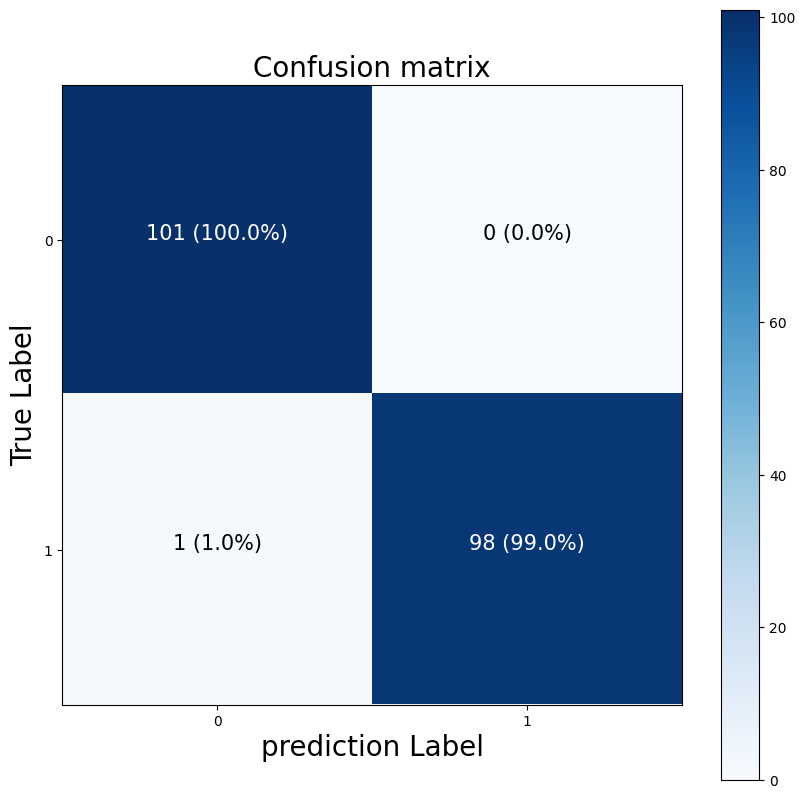

In [ ]:
#Note : the confusion matrix of  sklesr
import itertools

figsize= (10, 10)

#create the confusion matrix
cm = confusion_matrix(Y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

#lets prettify it
fig, ax = plt.subplots(figsize= figsize)
#create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False
if classes:
  labels = classes
else :
   labels = np.arange(cm.shape[0])
# labels the axes
ax.set(title="Confusion matrix",
       xlabel="prediction Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
# set threshold for different colors
threshold= (cm.max() + cm.min())/ 2.
#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

###Working with a larger example (multiclass clasification  )
when you have more then two classes as a option , its known as **Multiclass clasification**



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# data has already been sorted into training and test seyts for us
(train_data, train_labels),(test_data, test_labels)=fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first traing example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training lable:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

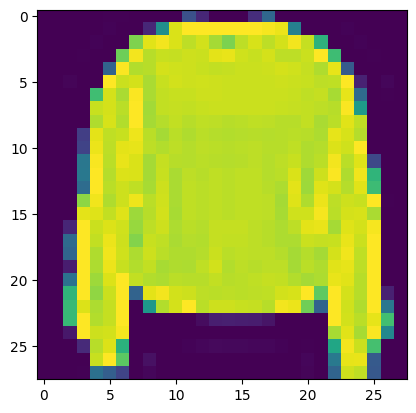

In [ ]:
#plot the single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
# Check out sample lable
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they human readable
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Coat')

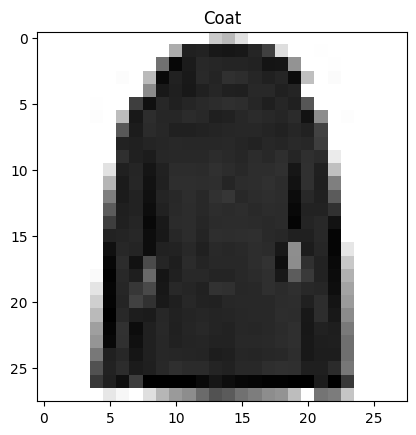

In [ ]:
#plot an example image and its label
index_of_choice= 2000
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

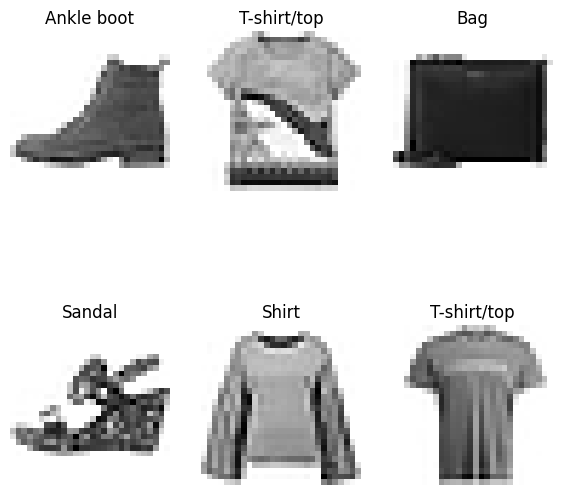

In [ ]:
#plot multiple random images
import random
plt.figure(figsize=(7, 7))
for i in range(6):
  ax= plt.subplot(2, 3, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

### Building  a multiclass clasification model

for our multi-class classification model,
1. input shape = 28x28(the shape of one image)
2. output shape = 10(one per class of clothing)
3. loss function= tf.keras.losses.Categoricalcrosstentropy()
4. output layer activation = softmax(not sigmoid)


In [ ]:
from keras.layers.serialization import activation
# set random seed
tf.random.set_seed(42)

# create a model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4352 - accuracy: 0.0985 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2695 - accuracy: 0.1171 - val_loss: 2.0486 - val_accuracy: 0.1963
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9046 - accuracy: 0.2421 - val_loss: 1.7564 - val_accuracy: 0.2711
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6888 - accuracy: 0.2870 - val_loss: 1.6640 - val_accuracy: 0.2657
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6367 - accuracy: 0.2916 - val_loss: 1.6321 - val_accuracy: 0.2932
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6183 - accuracy: 0.2971 - val_loss: 1.6192 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the min and max
train_data.min(), train_data.max()

(0, 255)

Neural network prefer data to be scaled

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm= train_data/255.0
test_data_norm=test_data/255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now aur data is normilizile
# Set random seed
tf.random.set_seed(42)

model_12=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#Input shape of our model
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax") # output shape of our model
])
# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3939 - accuracy: 0.4886 - val_loss: 1.0462 - val_accuracy: 0.5860
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9502 - accuracy: 0.5987 - val_loss: 0.8961 - val_accuracy: 0.6529
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7896 - accuracy: 0.7042 - val_loss: 0.7423 - val_accuracy: 0.7301
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6898 - accuracy: 0.7489 - val_loss: 0.6869 - val_accuracy: 0.7490
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6588 - accuracy: 0.7590 - val_loss: 0.6641 - val_accuracy: 0.7607
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6370 - accuracy: 0.7671 - val_loss: 0.6636 - val_accuracy: 0.7602
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6238 - accuracy: 0.7737 - val_loss: 0.6442 - val_accuracy:

<Axes: title={'center': 'Normilized data'}>

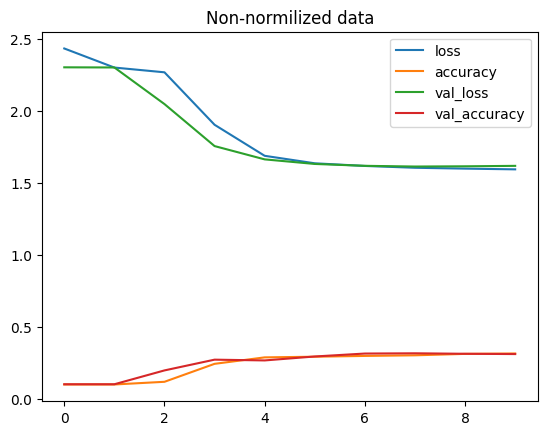

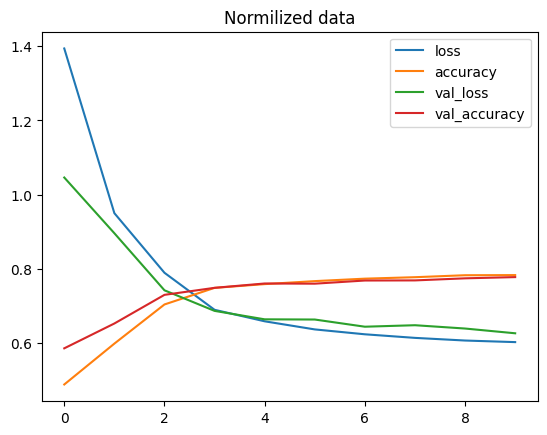

In [ ]:
import pandas as pd
#plot non-normalized data loss curvers
pd.DataFrame(non_norm_history.history).plot(title="Non-normilized data")
#plot Normilized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normilized data")

# Findig the idel learing rate

In [ ]:
#set the random seed
tf.random.set_seed(42)
#create the model
model_13= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")# softmax we use here is because we are workeing on multiclass clasification

])
#compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Create the learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#Fit te model

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1858 - accuracy: 0.5875 - val_loss: 0.7002 - val_accuracy: 0.7629 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6177 - accuracy: 0.7872 - val_loss: 0.5995 - val_accuracy: 0.7956 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5668 - accuracy: 0.8021 - val_loss: 0.6000 - val_accuracy: 0.7837 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5457 - accuracy: 0.8079 - val_loss: 0.5886 - val_accuracy: 0.7981 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5370 - accuracy: 0.8087 - val_loss: 0.5609 - val_accuracy: 0.8042 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5278 - accuracy: 0.8120 - val_loss: 0.5925 - val_accuracy: 0.7872 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 2s

Text(0.5, 1.0, 'Finding the ideal rate|')

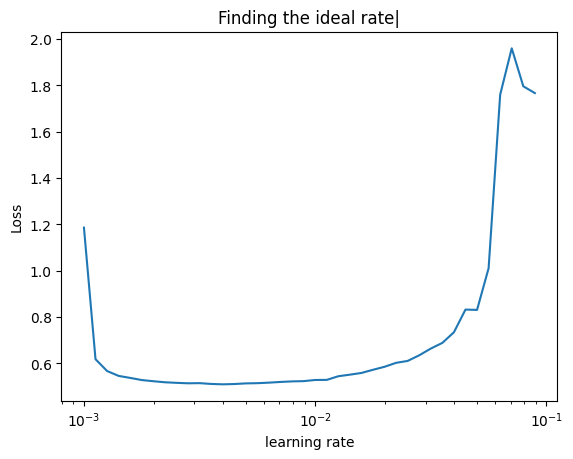

In [ ]:
#plot the learingg rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs= 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal rate|")

In [ ]:
#lets refit the model with the ideal learing rate
#set the random seed
tf.random.set_seed(42)
#create the model
model_14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")# softmax we use here is because we are workeing on multiclass clasification

])
#compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])
# Create the learning rate callback
#lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#Fit te model

history_14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels),)


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0556 - accuracy: 0.5935 - val_loss: 0.7754 - val_accuracy: 0.7135
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7304 - accuracy: 0.7261 - val_loss: 0.7331 - val_accuracy: 0.7405
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6868 - accuracy: 0.7470 - val_loss: 0.7091 - val_accuracy: 0.7319
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6582 - accuracy: 0.7581 - val_loss: 0.6692 - val_accuracy: 0.7530
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7659 - val_loss: 0.6561 - val_accuracy: 0.7643
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6179 - accuracy: 0.7725 - val_loss: 0.6695 - val_accuracy: 0.7582
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6076 - accuracy: 0.7752 - val_loss: 0.6432 - val_accuracy:

# Evaluating our multiclass classification model

to evaluate our multi-class classification model we could
1. Evaluate its performance using other classification metrix
( such as confusion matrix)
2. Assess some of its prediction (throungh vizulizations)
3. Improve its  results (by training  it for longer or changeing the artitecture)
4. save an export it for use in an application

lets go for top two


In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)



  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs =model_14.predict(test_data_norm)

# view the first 5 prediction
y_probs[:5]

313/313 [==============================] - 0s 891us/step


array([[1.1924682e-10, 4.6283954e-08, 1.8731878e-06, 8.2366180e-12,
        2.4122546e-06, 5.0105084e-02, 1.0003295e-07, 4.0776119e-02,
        1.1603651e-02, 8.9751065e-01],
       [6.9884947e-05, 4.7451480e-13, 9.1995466e-01, 2.2759745e-09,
        5.1420406e-03, 0.0000000e+00, 6.9695488e-02, 9.5921075e-23,
        5.1378547e-03, 2.6507231e-27],
       [1.5219973e-08, 9.9843413e-01, 8.6433380e-07, 2.3913573e-04,
        1.3234036e-03, 9.8686529e-25, 2.4199148e-06, 1.3502267e-08,
        8.3030104e-11, 1.5281969e-22],
       [6.4934114e-10, 9.9984813e-01, 2.7298279e-08, 4.4146360e-05,
        1.0755834e-04, 3.8693314e-22, 9.2393996e-08, 8.0598390e-08,
        3.7848392e-12, 4.7847350e-22],
       [6.8542048e-02, 3.4925117e-05, 3.3557338e-01, 4.2409622e-03,
        5.4921322e-02, 5.5807436e-19, 4.8597148e-01, 2.5620372e-09,
        5.0715942e-02, 1.7372061e-12]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.1924682e-10, 4.6283954e-08, 1.8731878e-06, 8.2366180e-12,
        2.4122546e-06, 5.0105084e-02, 1.0003295e-07, 4.0776119e-02,
        1.1603651e-02, 8.9751065e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all the predictions probability into integers
y_preds= y_probs.argmax(axis=1)

# View the first 10. pridiction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 2, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[733,   1,  10,  86,   4,   0, 130,   2,  34,   0],
       [  1, 944,   5,  27,  18,   0,   2,   0,   3,   0],
       [ 15,   1, 579,   8, 201,   0, 154,   0,  42,   0],
       [ 43,  17,   5, 781,  51,   1,  94,   0,   8,   0],
       [  2,   3, 150,  15, 753,   0,  61,   0,  16,   0],
       [  0,   0,   0,   0,   0, 887,   0,  48,   9,  56],
       [164,   2, 205,  44, 136,   1, 390,   0,  58,   0],
       [  0,   0,   0,   0,   0,  38,   0, 904,   1,  57],
       [ 15,   1,   6,   6,   2,   8,  10,   7, 939,   6],
       [  0,   0,   0,   0,   0,  20,   0,  35,   9, 936]])

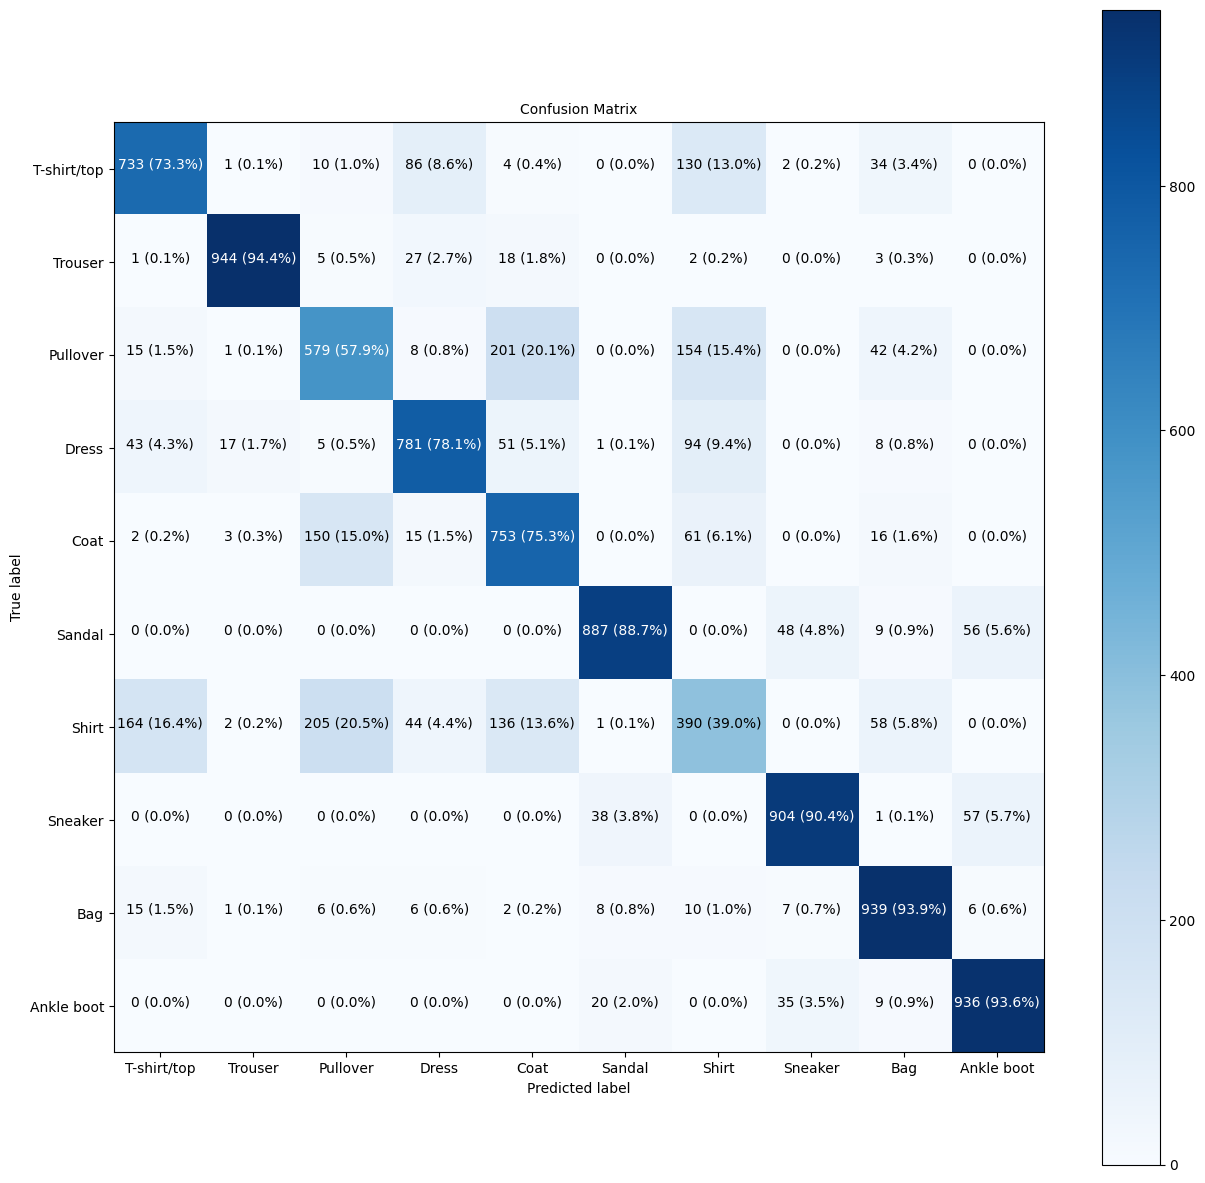

In [ ]:
#make prettier matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

# How about we create a fun little function for :
1. Plot a random image
2.  Make a pridiction on said image
3. Lable the plot with the truth lable & the pridiction lable

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 16ms/step


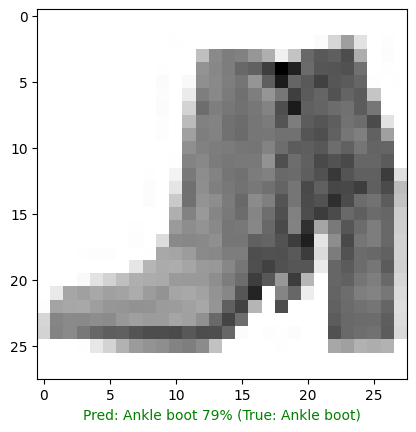

In [ ]:
# check out the random image as well as its pridiction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

# What pattern is our model learing?

In [ ]:
# Find the layer of our most resent model
model_14.layers

In [ ]:
# Extarct a paticular layer
model_14.layers[1]

In [ ]:
# Get the pattern of a layer in our network
weights, biases= model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-5.9398717e-01, -3.8966764e-02, -8.4364271e-01,  6.6966212e-01],
        [-1.3313637e+00,  1.5655324e-02, -4.8901185e-01,  8.9904010e-01],
        [-9.8862547e-01, -5.1563568e-03, -1.1550109e+00,  1.1029559e+00],
        ...,
        [-1.4477046e-01, -4.7211666e-04,  3.6528683e-01,  2.6071575e-01],
        [-5.0203311e-01,  6.1308097e-02,  8.1786782e-01,  2.1293880e-01],
        [ 1.4018750e-01,  3.2554116e-02, -6.9451165e-01,  4.0413862e-01]],
       dtype=float32),
 (784, 4))

Now lets check out the bias vector

In [ ]:
# bias and biases shape
biases,biases.shape

(array([-0.32766676, -0.03052733,  0.21354921,  0.8285971 ], dtype=float32),
 (4,))

Every neuran has a biases vector . Each of threse is paired with a weight matrix.

THE bias vector get initilized as zeros( at least in the caseof a Tensorflow dense layer)

the bias vector dictate how much the pattern within the corresponding weights should infulense the next layers

In [ ]:
model_14.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


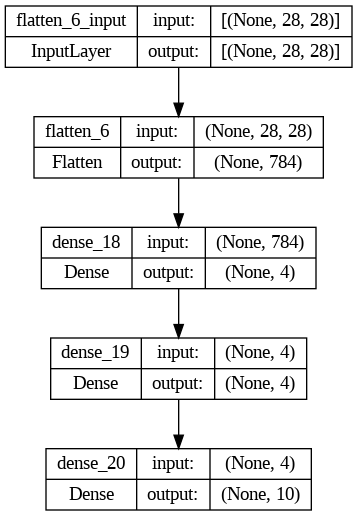

In [ ]:
# Lets chjeck out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the input and output
plot_model(model_14, show_shapes=True)